In [1]:
%cd /content/drive/MyDrive/FLYAI_CLS_DATA

!unzip -qq "/content/drive/MyDrive/FLYAI_CLS_DATA/archive (1).zip"

/content/drive/MyDrive/FLYAI_CLS_DATA


In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# 디렉토리 경로 설정
base_dir = '/content/drive/MyDrive/FLYAI_CLS_DATA/PetImages'
pet = ['Cat', 'Dog']
img_size = (28,28)

# Load and preprocess the data
def load_data(base_dir, categories, img_size):
    data = []
    labels = []

    for category in categories:
        path = os.path.join(base_dir, category)
        class_num = categories.index(category)

        for img in os.listdir(path):
            try:
                img_array = Image.open(os.path.join(path, img)).convert('L')  # Convert to grayscale
                img_array = img_array.resize(img_size)
                data.append(np.array(img_array))
                labels.append(class_num)
            except Exception as e:
                pass  # Skip images that can't be opened

    return np.array(data), np.array(labels)

# Load the data
X, y = load_data(base_dir, pet, img_size)

# Normalize pixel values to be between 0 and 1
X = X / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for the model
X_train = X_train.reshape(-1, img_size[0], img_size[1], 1)
X_test = X_test.reshape(-1, img_size[0], img_size[1], 1)




/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [ ]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_test, y_test))




Epoch 1/50
625/625 [==============================] - 12s 16ms/step - loss: 0.6889 - accuracy: 0.5355 - val_loss: 0.6794 - val_accuracy: 0.5714
Epoch 2/50
625/625 [==============================] - 9s 15ms/step - loss: 0.6799 - accuracy: 0.5687 - val_loss: 0.6511 - val_accuracy: 0.6206
Epoch 3/50
625/625 [==============================] - 10s 16ms/step - loss: 0.6630 - accuracy: 0.5998 - val_loss: 0.6510 - val_accuracy: 0.6172
Epoch 4/50
625/625 [==============================] - 10s 16ms/step - loss: 0.6440 - accuracy: 0.6274 - val_loss: 0.6083 - val_accuracy: 0.6656
Epoch 5/50
625/625 [==============================] - 9s 14ms/step - loss: 0.6343 - accuracy: 0.6387 - val_loss: 0.6128 - val_accuracy: 0.6526
Epoch 6/50
625/625 [==============================] - 11s 17ms/step - loss: 0.6268 - accuracy: 0.6450 - val_loss: 0.5994 - val_accuracy: 0.6728
Epoch 7/50
625/625 [==============================] - 10s 16ms/step - loss: 0.6239 - accuracy: 0.6498 - val_loss: 0.5764 - val_accuracy: 0

157/157 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.6890
Test Loss: 0.5807
Test Accuracy: 0.6890


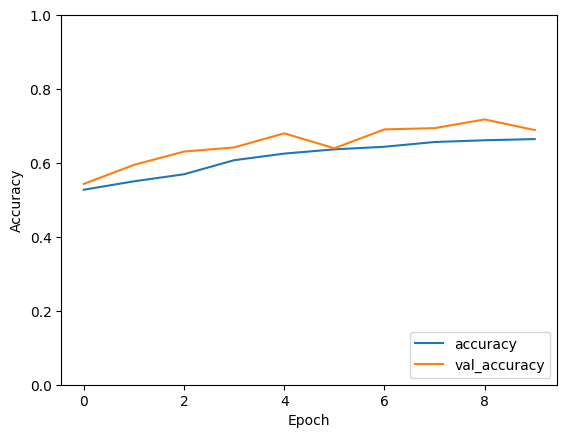

In [5]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

157/157 [==============================] - 0s 2ms/step


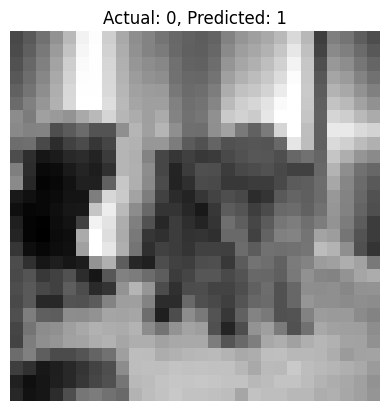

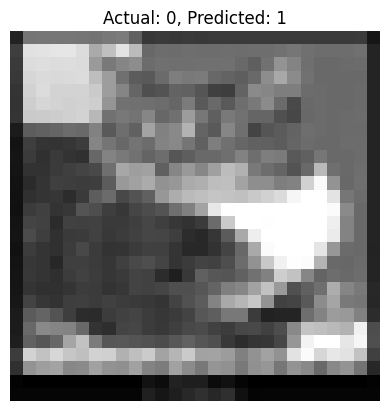

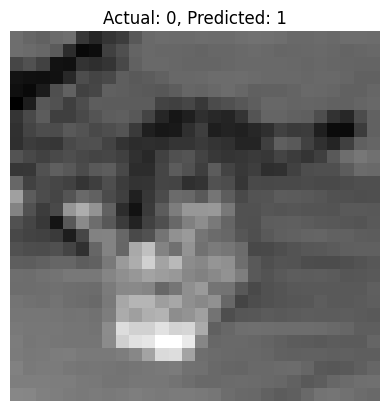

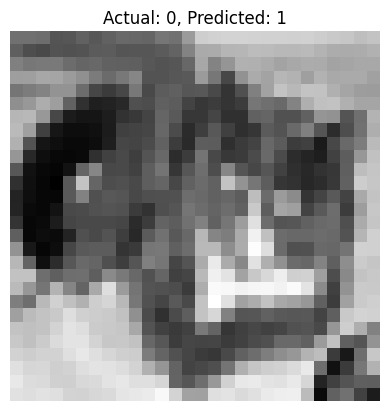

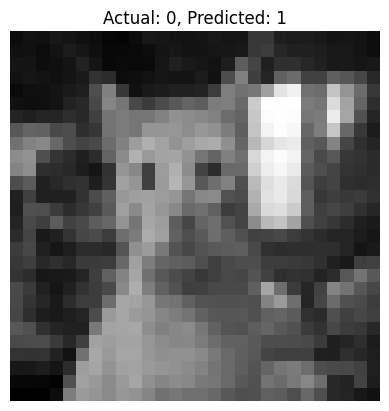

In [6]:
# Predictions on the test set
predictions = model.predict(X_test)

# Convert predictions to binary (0 or 1)
predicted_labels = np.round(predictions).flatten().astype(int)

# Find indices where predictions are incorrect
incorrect_indices = np.where(predicted_labels != y_test)[0]

# Display some incorrect predictions
num_examples_to_display = 5
for i in range(min(num_examples_to_display, len(incorrect_indices))):
    index = incorrect_indices[i]

    # Display the image
    plt.imshow(X_test[index].reshape(img_size[0], img_size[1]), cmap='gray')
    plt.title(f'Actual: {y_test[index]}, Predicted: {predicted_labels[index]}')
    plt.axis('off')
    plt.show()
